# 1. AdaBoost

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df = pd.read_excel('./banknote.xlsx')
df = df.drop(["Unnamed: 0"],axis = 1)
df.head()

,variance,skewness,kurtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### (1) 데이터 셋을 80%는 train 데이터, 20%는 test 데이터로 분리해주세요. (타겟은 class 열입니다)

In [26]:
X=df[['variance','skewness','kurtosis','entropy']]
y=df['class']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=156)

### (2) 200개의 의사 결정 트리 모형을 개별 모델로 사용하는 에이다부스트 분석기를 만들고 학습시켜주세요.
#### (max_depth=1, algorithm='SAMME', learning_rate=0.5로 설정)

In [21]:
ada_clf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm='SAMME', learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

### (3) 학습시킨 데이터를 이용하여 예측을 수행하여 주세요. (predictions라는 변수 이름 사용)

In [22]:
predictions=ada_clf.predict(X_test)
ada_accuracy=accuracy_score(y_test, predictions)
print('정확도:{0:.4f}'.format(ada_accuracy))

정확도:1.0000


### (4) 오차행렬(confusion matrix)을 이용해 모델을 평가해주세요.

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[150,   0],
       [  0, 125]], dtype=int64)

 # 2. gbm 알고리즘 재현해보기

#### * regression tree를 이용해 gbm 알고리즘을 간단히 재현해보는 문제입니다. (슬라이드40참고) 
#### * 주어진 데이터를 이용하세요
#### * 트리모형의 하이퍼 파라미터는 max_depth = 5만 사용해주세요

In [30]:
import pandas as pd
import numpy as np
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

### 1) DecisionTreeRegressor 이용하여 첫번째 weak learner를 만드세요

In [31]:
from sklearn.tree import DecisionTreeRegressor

### 2) 잔차(y - f1(x))를 새로운 목표값 y2라 지정하고 이에 대한 두번째 weak learner를 만드세요

### 3) 다시 잔차(y- f1(x) - f2(x))를 새로운 목표값 y3라 지정하고 이에 대한 세번째 weak learner를 만드세요

### 4) 새롭게 주어진 데이터(X_new)를 대입한 최종 예측값을 출력하세요

In [3]:
X_new = np.array([0.5,0.3,0.1])
X_new = X_new.reshape(-1,1)

# 3. 사이킷런 래퍼 XGBoost

- data.csv를 data1으로 읽어오세요.
- 이 데이터는 음료수를 구분하는 데이터세트 입니다. 
- 타겟은 마지막 열이고, 나머지 열은 피처입니다.
- 타겟 레이블 값의 종류는 0, 1, 2로 각각 음료수1, 음료수2, 음료수3 입니다.

In [54]:
import xgboost as xgb
from xgboost import plot_importance

In [34]:
data1=pd.read_csv('./data.csv')
data1.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [48]:
X=data1.iloc[:,:13]
y=data1['N']

- train_test_split()에서 test_size은 0.2, random_state은 자신의 나이로 설정합니다.
- xgboost를 사용하여 n_estimators=400, learning_rate=0.1, max_depth=3으로 설정하여 학습합니다.
- fit()함수에서 early_stopping_rounds=100으로 설정해주세요. (하지만 e로 시작하는 다른 하이퍼 파라미터의 대한 값을 변경해야합니다.)

In [52]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=23)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [66]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc=roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [67]:
from xgboost import XGBClassifier

In [68]:
xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds=xgb_wrapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

C:\ANACONDA\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [69]:
get_clf_eval(y_test, w_preds, w_pred_proba)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

- test score의 평균값을 구하세요.(cv=5)

In [5]:
get_clf_eval(y_test, w_preds, w_pred_proba)

[0.97222222 0.91666667 0.94444444 0.97142857 1.        ]
avg test score: 0.9610 (+/-0.0283)


- 피처 중요도 그래프를 그리세오.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

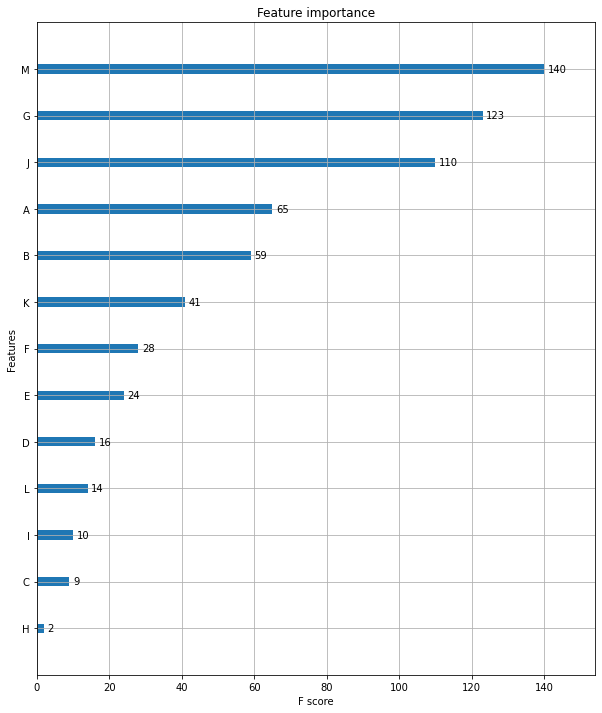

- 트리로 시각화하세요.

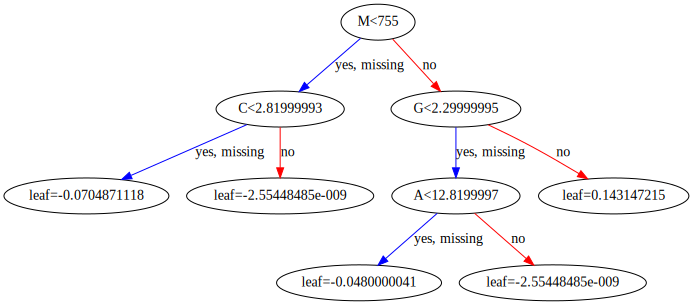

# 4. 사이킷런 래퍼 LightGBM

- data.csv를 다시 로드하여 data2로 읽어오세요.
- 타겟은 마지막 M이고, M열을 제외한 나머지 열은 피처입니다.
- 타겟 레이블 채소 파(cm)의 길이입니다.

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


- train_test_split()에서 test_size은 0.2, random_state은 자신의 나이+10으로 설정합니다.
- lightgbm를 사용하여 n_estimators=400으로 설정하여 학습합니다.
- fit()함수에서 early_stopping_rounds=100으로 설정해주세요.

[1]	valid_0's l2: 84646.1
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 73801.2
[3]	valid_0's l2: 64035.5
[4]	valid_0's l2: 56609.7
[5]	valid_0's l2: 50595.5
[6]	valid_0's l2: 45417.9
[7]	valid_0's l2: 41313.7
[8]	valid_0's l2: 37823.5
[9]	valid_0's l2: 35082.1
[10]	valid_0's l2: 32629.1
[11]	valid_0's l2: 30219.5
[12]	valid_0's l2: 28504.3
[13]	valid_0's l2: 27376.1
[14]	valid_0's l2: 26298.9
[15]	valid_0's l2: 26014.4
[16]	valid_0's l2: 24825.5
[17]	valid_0's l2: 24446
[18]	valid_0's l2: 23787.5
[19]	valid_0's l2: 23635.3
[20]	valid_0's l2: 23324.1
[21]	valid_0's l2: 22719.6
[22]	valid_0's l2: 22612.6
[23]	valid_0's l2: 22382.6
[24]	valid_0's l2: 21925.3
[25]	valid_0's l2: 21836.2
[26]	valid_0's l2: 21703
[27]	valid_0's l2: 21220.4
[28]	valid_0's l2: 21010
[29]	valid_0's l2: 20598.6
[30]	valid_0's l2: 20441.9
[31]	valid_0's l2: 20329.2
[32]	valid_0's l2: 20225.2
[33]	valid_0's l2: 19923.2
[34]	valid_0's l2: 19942.2
[35]	valid_0's l2: 19656
[36]	valid

- test score의 평균값을 구하세요.(cv=5)

[-0.03309467  0.48363569 -0.58482607 -0.97955651 -0.6067864 ]
avg test score: -0.3441 (+/-0.5124)


- 피처 중요도 그래프를 그리세오.

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

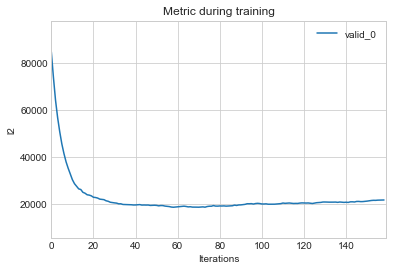

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

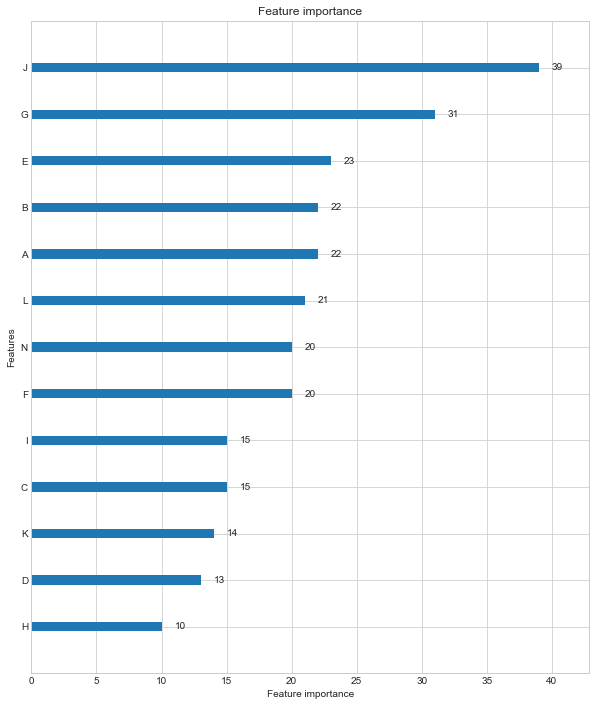

- 트리로 시각화하세요.

<AxesSubplot:>

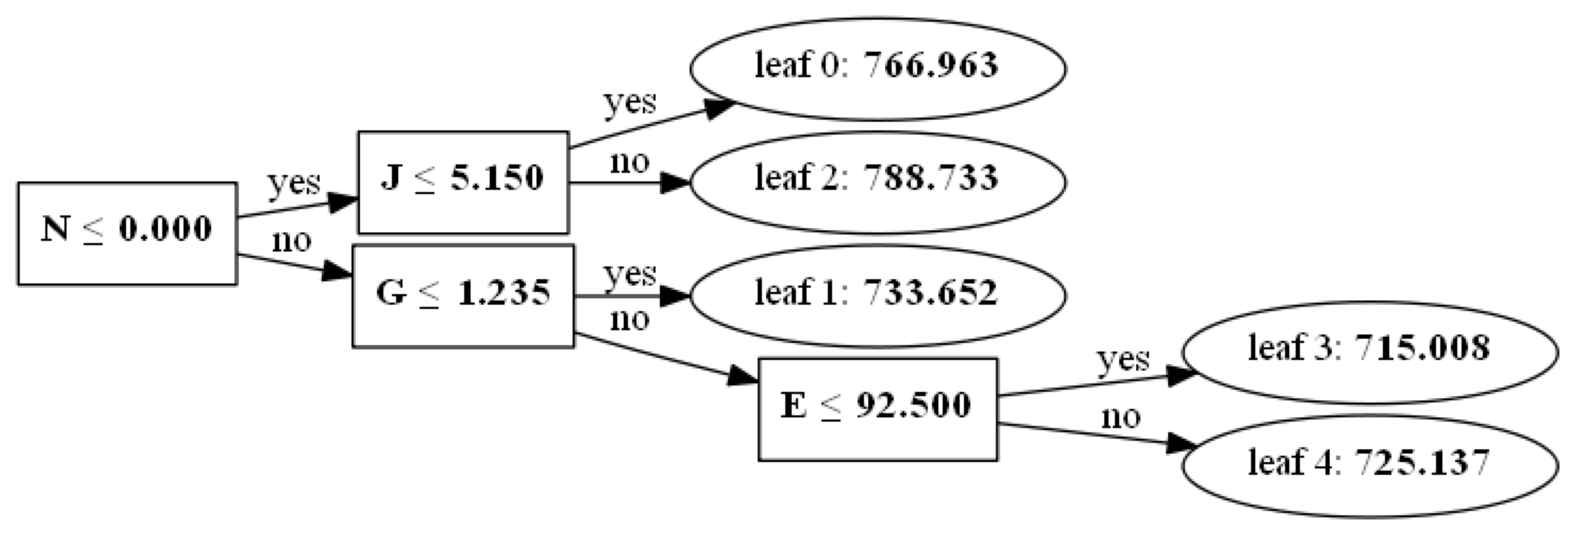